# PHYS 447B: Orbital Mechanics
## Homework 1

Shelby Quiring, 10157162, Jan 13th 2023

Questions: 1.3, 1.5, 1.7, 2.5, 2.7, 2.9

In [2]:
# Library imports
import numpy as np
import matplotlib.pyplot as plt

### `Question 1.3`
The absolute position, velocity and acceleration of O are


\begin{gather}
r_O = 300 \hat{I} + 200 \hat{J} + 100 \hat{K} (m) \\
v_O = −10 \hat{I} + 30 \hat{J} − 50 \hat{K} (m/s) \\
a_O = 25 \hat{I} + 40 \hat{J} − 15 \hat{K} (m/s^2)
\end{gather}


The angular velocity and acceleration of the moving frame are
\begin{gather}
\Omega = 0.6 \hat{I} − 0.4 \hat{J} + 1.0 \hat{K} (rad/s) \\
\dot{\Omega} = −0.4 \hat{I} + 0.3 \hat{J} − 1.0 \hat{K} (rad/s^2)
\end{gather}

The unit vectors of the moving frame are
\begin{gather}
\hat{i} = 0.57735 \hat{I} + 0.57735 \hat{J} + 0.57735 \hat{K} \\
\hat{j} = −0.74296 \hat{I} + 0.66475 \hat{J} + 0.078206 \hat{K} \\
\hat{k} = −0.33864 \hat{I} − 0.47410 \hat{J} + 0.81274 \hat{K}
\end{gather}

The absolute position of P is
\begin{gather}
r = 150 \hat{I} − 200 \hat{J} + 300 \hat{K} (m)
\end{gather}

The velocity and acceleration of P relative to the moving frame are
\begin{gather}
v_{rel} = −20 \hat{i} + 25 \hat{j} + 70 \hat{k} (m/s) \\
a_{rel} = 7.5 \hat{i} − 8.5 \hat{j} + 6.0 \hat{k} (m/s^2)
\end{gather}


Calculate the absolute velocity $v_P$ and acceleration $a_P$ of P. 

<center>

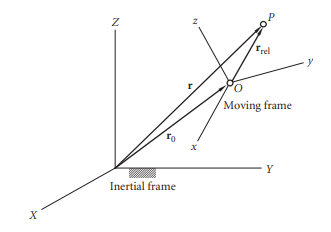 <br>
**Fig:** Absolute and Relative Position Vectors
</center>


{Ans.:
\begin{gather}
v_P = 478.7 \hat{u}_v (m/s), \hat{u}_v = 0.5352 \hat{I} − 0.5601 \hat{J} − 0.6324 \hat{K} \\
a_P = 616.3 \hat{u}_a (m/s^2), \hat{u}_a = 0.1655 \hat{I} + 0.9759 \hat{J} + 0.1424 \hat{K}
\end{gather}
}


#### Answer 1.3

From Equation 1.35, we have that the absolute velocity is the sum of the absolute velocity of the origin of the moving frame and the relative velocity in that frame, with Equation 1.36 defining the time derivative of the relative position vector:

\begin{gather}
\textbf{v}_p = \textbf{v}_O + \frac{d \textbf{r}_{rel}}{dt} \\
\frac{d \textbf{r}_{rel}}{dt} = \textbf{v}_{rel} + \boldsymbol{\Omega} \times \textbf{r}_{rel}
\end{gather}

Equation 1.42 defines the abolute acceleration using the 5-term acceleration model that captures the effects of the rotating and accelerating frame:

\begin{gather}
\textbf{a}_p = 
\textbf{a}_O + 
\boldsymbol{\dot{\Omega}} \times \textbf{r}_{rel} + 
\boldsymbol{\Omega} \times ( \boldsymbol{\Omega} \times \textbf{r}_{rel} ) + 
\boldsymbol{\Omega} \times \textbf{v}_{rel} +
\textbf{a}_{rel}
\end{gather}


To calculate the relative position vector we subtract $\textbf{r}_O$ from $\textbf{r}$:

\begin{gather}
\textbf{r}_{rel} = \textbf{r} - \textbf{r}_O 
\end{gather}

From this we can now evaluate the expressions above:

In [26]:
# Evaluating Q1.3
ro = np.array([300, 200, 100]) # Inertial frame
vo = np.array([-10, 30, -50]) # Inertial frame
ao = np.array([25, 40, -15]) # Inertial frame

omega = np.array([0.6, -0.4, 1]) # Inertial frame
omegaDot = np.array([-0.4, 0.3, -1]) # Inertial frame

r = np.array([150, -200, 300]) # Inertial frame
 

coordMatrix = np.array([
    [0.57735, 0.57735, 0.57735],
    [-0.74296, 0.66475, 0.078206],
    [-0.33864, -0.47410, 0.81274]
]) # Inertial to relative frame

invCoodrMatrix = np.linalg.inv(coordMatrix)

vrel_relative = np.array([-20, 25, 70]) # Relative frame
arel_relative = np.array([7.5, -8.5, 6]) # Relative frame

# Calculate r_rel
rrel = r - ro

# Convert v_rel to inertial frame
vrel = invCoodrMatrix @ vrel_relative

# Convert a_rel to inertial frame
arel = invCoodrMatrix @ arel_relative

# Calculate v_p
vp = vo + vrel + np.cross(omega, rrel)
print(f'Absolute Velocity v_p: {vp}')
print(f'Magnitude: {np.round( np.sqrt(vp.dot(vp)), 2)}')
print(f'Direction: {np.round( vp / np.sqrt(vp.dot(vp)), 3)}')


# Calculate a_p
ap = ao + np.cross(omegaDot, rrel) + np.cross(omega, np.cross(omega, rrel)) + \
     np.cross(2*omega, vrel) + arel
print(f'\nAbsolute Acceleration a_p: {ap}')
print(f'Magnitude: {np.round( np.sqrt(ap.dot(ap)), 2)}')
print(f'Direction: {np.round( ap / np.sqrt(ap.dot(ap)), 3)}')


# Answer agrees with book :)

Absolute Velocity v_p: [ 256.17403531 -268.11539381 -302.6996738 ]
Magnitude: 478.68
Direction: [ 0.535 -0.56  -0.632]

Absolute Acceleration a_p: [102.00394902 601.42281409  87.74258554]
Magnitude: 616.29
Direction: [0.166 0.976 0.142]


### `Question 1.5`

An airplane in level flight at an altitude *h* and a uniform speed *v* passes directly over a radar tracking station *A*. Calculate the angular velocity $\dot{\theta}$ and angular acceleration of the radar antenna $\ddot{\theta}$ as well as the rate $\dot{r}$ at which the airplane is moving away from the antenna. Use the equations of this chapter (rather than polar coordinates, which you can use to check your work). Attach the inertial frame of reference to the ground and assume a non-rotating earth. Attach the moving frame to the antenna, with the x axis pointing always from the antenna towards the airplane.

<center>

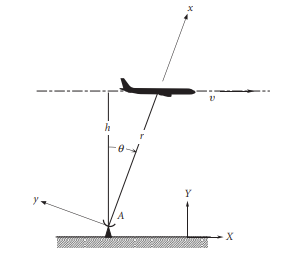 <br>
**Fig:** Airplane over Radar Station
</center>


{Ans.: (a) $\dot{\theta} = v cos^2 (θ/h)$; (b) $\ddot{\theta} = −2v^2 cos^3 (θ) sin (θ/h^2)$; (c) $v_{rel} = v sin (θ)$}


#### Answer 1.5

Solving analytically:

a)

\begin{gather}
tan (\theta) = \frac{vt}{h} \\
\frac{d}{dt} (tan (\theta)) = \frac{1}{cos^2 (\theta)} \dot{\theta} = \frac{v}{h} \\
\therefore \dot{\theta} = \frac{v}{h} cos^2 (\theta)
\end{gather}


b)

\begin{gather}
\frac{d}{dt} \dot{\theta} = \ddot{\theta} = \frac{v}{h} 2 (cos (\theta)) (-sin (\theta)) \dot{\theta} \\
\therefore \ddot{\theta} = \frac{v^2}{h^2} cos^3 (\theta) sin (\theta)
\end{gather}


c)

\begin{gather}
sin (\theta) = \frac{v_{rel}}{v} \\
\therefore v_{rel} = v sin (\theta)
\end{gather}

### `Question 1.7`

At 29◦ north latitude, what is the deviation d from the vertical of a plumb bob at the end of a 30 m string, due to the earth’s rotation?

<center>

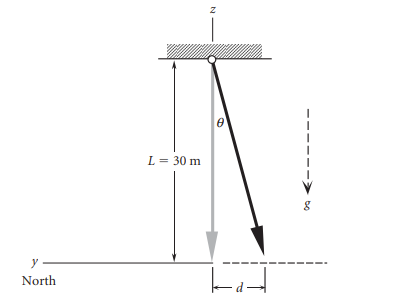 <br>
**Fig:** Plumb Bob
</center>


{Ans.: 44.1 mm to the south}

#### Answer 1.7

Using Equation 1.56 to find the absolute acceleration on the bob due to the rotation of the Earth. 

\begin{gather}
\textbf{a} = 
[ \ddot{x} + \frac{\dot{x}(\dot{z} - \dot{y} tan (\phi))}{R_e + z} + 2 \Omega (\dot{z} cos (\phi) - \dot{y} sin (\phi)) ] \hat{i} \ + \\
[ \ddot{y} + \frac{\dot{y}\dot{z} + \dot{x}^2 tan (\phi)}{R_e + z} + \Omega sin (\phi) ( \Omega (R_E + z) cos (\phi) + 2 \dot{x}) ] \hat{j} \ + \\
[ \ddot{z} - \frac{\dot{x}^2 + \dot{y}^2}{R_e + z} - \Omega cos (\phi) ( \Omega (R_E + z) cos (\phi) + 2 \dot{x})] \hat{k} \\
\end{gather}

Supporting equations 1.49b:

\begin{gather}
\dot{x} = (R_e + z) \dot{\Lambda} cos (\phi) = 0 [ \Lambda = \dot{\Lambda} = 0 ] \\
\dot{y} = (R_e + z) \dot{\phi} = 0 \\
\dot{z} =  0
\end{gather}

Simplifying:

\begin{gather}
\textbf{a} = 
 \Omega sin \phi ( \Omega (R_E + z) \cos{\phi} )  \hat{j} \ - 
 \Omega cos \phi ( \Omega (R_E + z) \cos{\phi} ) \hat{k} 
\end{gather}

The acceleration due to gravity will be $-g \hat{k}$. The tension in the rope will act to make the bob stationary, and therefore angle of the rope (or the deflection at the end) can be determined by solving for the tension.



In [43]:
# Evaluating Q1.7

Re = 6371e3 # m, Earth radius
omega = (2 * np.pi)/ (24 * 60 * 60) # Rad/s, Earth spin speed
z = 0
phi = 29 * np.pi/180 # deg latitude
L = 30 # m, line length

# Calculating acceleration
a = omega * (omega * (Re + z) * np.cos(phi)) * np.array([np.sin(phi), -np.cos(phi)])

g = np.array([0, -9.8]) # m/s^2

tension = -(a+g) # Solving for the tension in the rope
d = (L * (tension[0] / tension[1])) * 1e3 # Calculating deviation
print(f'Deviation: {np.round(d, 2)} mm')

# Answer agrees with book :)

Deviation: -43.62 mm


### `Question 2.5`

A satellite is in a circular, 350 km orbit (i.e., it is 350 km above the  Earth’s surface).

Calculate
(a) the speed in km/s;
(b) the period.


{Ans.: (a) 7.697 km/s; (b) 91 min 32 s}

#### Answer 2.5

Using Equation 2.35 for the velocity, given the following simplifications:

\begin{gather}
\mu = G(M_e + m) \approx GM_e \ \ (M_e >> m) \\
h = \textbf{r} \times \mathbf{\dot{r}} = |r||\dot{r}| \sin{\theta} = |r||\dot{r}| \ \ (circular \ \ orbit)
\end{gather} 

\begin{gather}
r = \frac{h^2}{\mu} \frac{1}{1 + e \cos{\theta}} \\
r \mu = r^2 \dot{r}^2 \\
\dot{r} = \sqrt{\frac{\mu}{r}}
\end{gather}

To get the period, we use Equation 2.45, $T_{circ} = \frac{2 \pi}{\sqrt{\mu}} r ^ \frac{3}{2}$

In [61]:
# Answer 2.5

Re = 6371e3 # m, Earth radius
Me = 5.97e24 # kg, Earth mass
G = 6.67e-11 # Gravitational constant
altitude = 350e3 # m

mu = G*Me # Approximation for small satellite mass
r = Re + altitude

v = np.sqrt(mu / r) # Tangential velocity
print(f'Velocity: {np.round(v*1e-3, 4)} km/s')

T = 2*np.pi / np.sqrt(mu) * r ** 1.5
print(f'Period: {np.round(T, 4)} s / {np.round(T / 60)} min, {np.round((T/60 - np.round(T/60))*60)} s')

Velocity: 7.6972 km/s
Period: 5486.3136 s / 91.0 min, 26.0 s


### `Question 2.7`

It is desired to place a satellite in earth polar orbit such that successive ground tracks at the equator are spaced 3000 km apart. Determine the required altitude of the circular orbit.


{Ans.: 1440 km}

#### Answer 2.7

To answer this question, we assume that the orbit does not precess about the Earth, but that the relative movement at the equator is due to the rotation of the Earth. We caucluate the time for the Earth at the equator to rotate 3000 km, and use the circular orbit period formula $T_{circ} = \frac{2 \pi}{\sqrt{\mu}} r ^ \frac{3}{2}$.

In [82]:
# Answer 2.7

Re = 6371e3 # m, Earth radius
Me = 5.97e24 # kg, Earth mass
G = 6.67e-11 # Gravitational constant

mu = G*Me

a = 3000e3 / Re # Angle between successive ground tracks, rad
T = 24 * 3600 * a / (2*np.pi) # Required orbital period, s

r = (T * np.sqrt(mu) / (2*np.pi))**(2/3)
altitude = r - Re
print(f'Circular Orbit Altitude: {np.round(altitude*1e-3)}')

# Close but not quite (?)

Circular Orbit Altitude: 1135.0


### `Question 2.9`

What velocity, relative to the earth, is required to escape the solar system on a parabolic
path from the earth’s orbit?


{Ans.: 12.34 km/s}

#### Answer 2.9

Using Equation 2.81, $v_{esc} \sqrt{\frac{2 \mu}{r}}$

In [91]:
# Answer 2.9

Re = 6371e3 # m, Earth radius
Me = 5.97e24 # kg, Earth mass
G = 6.67e-11 # Gravitational constant

mu = G*Me

v = np.sqrt(2*mu/(Re))

print(f'Escape Velocity: {np.round(v*1e-3, 2)} km/s')

# Does not agree - what??

Escape Velocity: 11.18 km/s
